# ** DIscBIO: a user-friendly pipeline for biomarker discovery in single-cell transcriptomics**

The pipeline consists of four successive steps: data pre-processing, cellular clustering and pseudo-temporal ordering, determining differential expressed genes and identifying biomarkers.

##                                                               PART 3

## Running the DIscBIO pipeline based on a list of genes related to Golgi Fragmentation
                                                   

![DIsccBIO](DiscBIO.png)

## Required Packages

In [1]:
library(DIscBIO)
library(partykit)
library(enrichR)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tap

## Loading dataset


The "CTCdataset" dataset consisting of single migratory circulating tumor cells (CTCs) collected from patients with breast cancer. Data are available in the GEO database with accession number GSE51827.The dataset should be formatted in a data frame where columns refer to samples and rows refer to genes. We provide here the possibility to load the dataset either as ".csv" or ".rda" extensions.The dataset should be formatted in a data frame where columns refer to samples and rows refer to genes. 
We provide here the possibility to load the dataset either as ".csv" or ".rda" extensions.

In [2]:
FileName<-"CTCdataset"       # Name of the dataset
#CSV=TRUE                     # If the dataset has ".csv", the user shoud set CSV to TRUE
CSV=FALSE                   # If the dataset has ".rda", the user shoud set CSV to FALSE

if (CSV==TRUE){
    DataSet <- read.csv(file = paste0(FileName,".csv"), sep = ",",header=T)
    rownames(DataSet)<-DataSet[,1]
    DataSet<-DataSet[,-1]
} else{
    load(paste0(FileName,".rda"))
    DataSet<-get(FileName)
}
cat(paste0("The ", FileName," contains:","\n","Genes: ",length(DataSet[,1]),"\n","cells: ",length(DataSet[1,]),"\n"))

The CTCdataset contains:
Genes: 13181
cells: 1462


### 1. Preparing the dataset

In [3]:
FG<- DISCBIO(DataSet)
FG<-Normalizedata(FG, mintotal=1000, minexpr=0, minnumber=0, maxexpr=Inf, downsample=FALSE, dsn=1, rseed=17000) 
FG<-FinalPreprocessing(FG,GeneFlitering="ExpF",export = TRUE)        # The GeneFiltering should be set to "ExpF"

GolgiFragGeneList<- read.csv(file = "GolgiFragGeneList.csv", sep = ",",header=F)
Data<-FG@fdata 
genes<-rownames(Data)
gene_list<- GolgiFragGeneList[,1]
idx_genes <- is.element(genes,gene_list)
OAdf<-Data[idx_genes,]   
FG@fdata<-OAdf
dim(FG@fdata)
cat(paste0("A list of ", length(OAdf[,1]), " genes will be used for the clustering","\n"))

The gene filtering method = Noise filtering

The Filtered Normalized dataset contains:
Genes: 13181
cells: 1448



The Filtered Normalized dataset was saved as: filteredDataset.Rdata



[1]   97 1448

A list of 97 genes will be used for the clustering


### 2. Cellular Clustering and Pseudo Time ordering

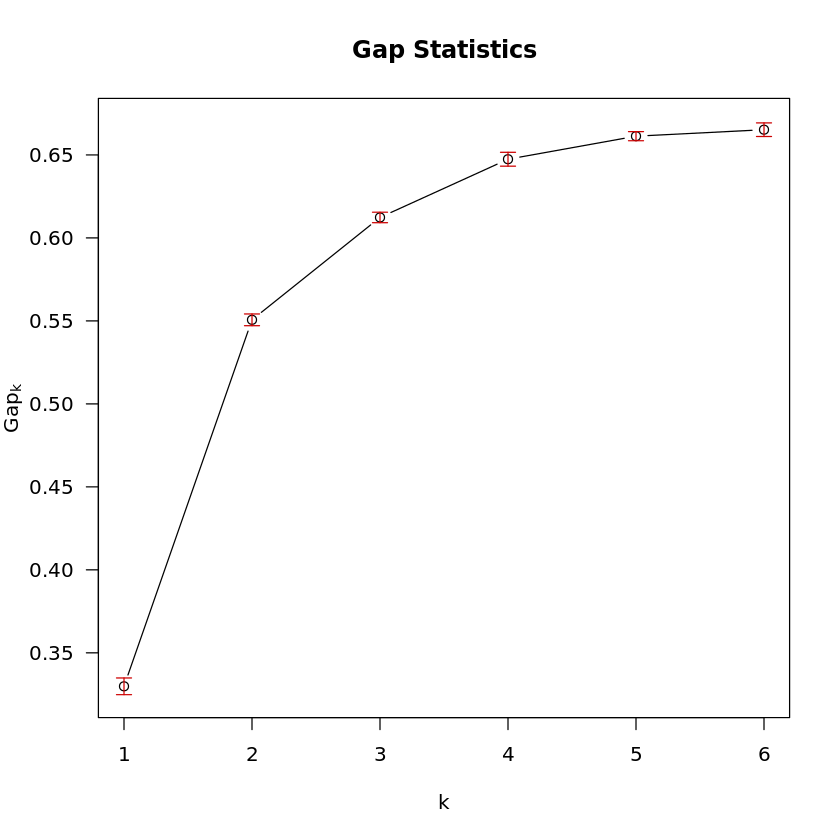

In [4]:
load("fg.RData")               # Loading the "fg" object that has include the data of the k-means clustering 
load("expdata.RData")          # Loading the "expdata" object and stored in the @expdata will be used to plot the expression of genes 
FG<-fg                         # Storing the data of fg in the FG 
FG@expdata<-expdata

########## Removing the unneeded objects
rm(expdata)
rm(DataSet)
rm(fg)

plotGap(FG)                                               ### Plotting gap statistics

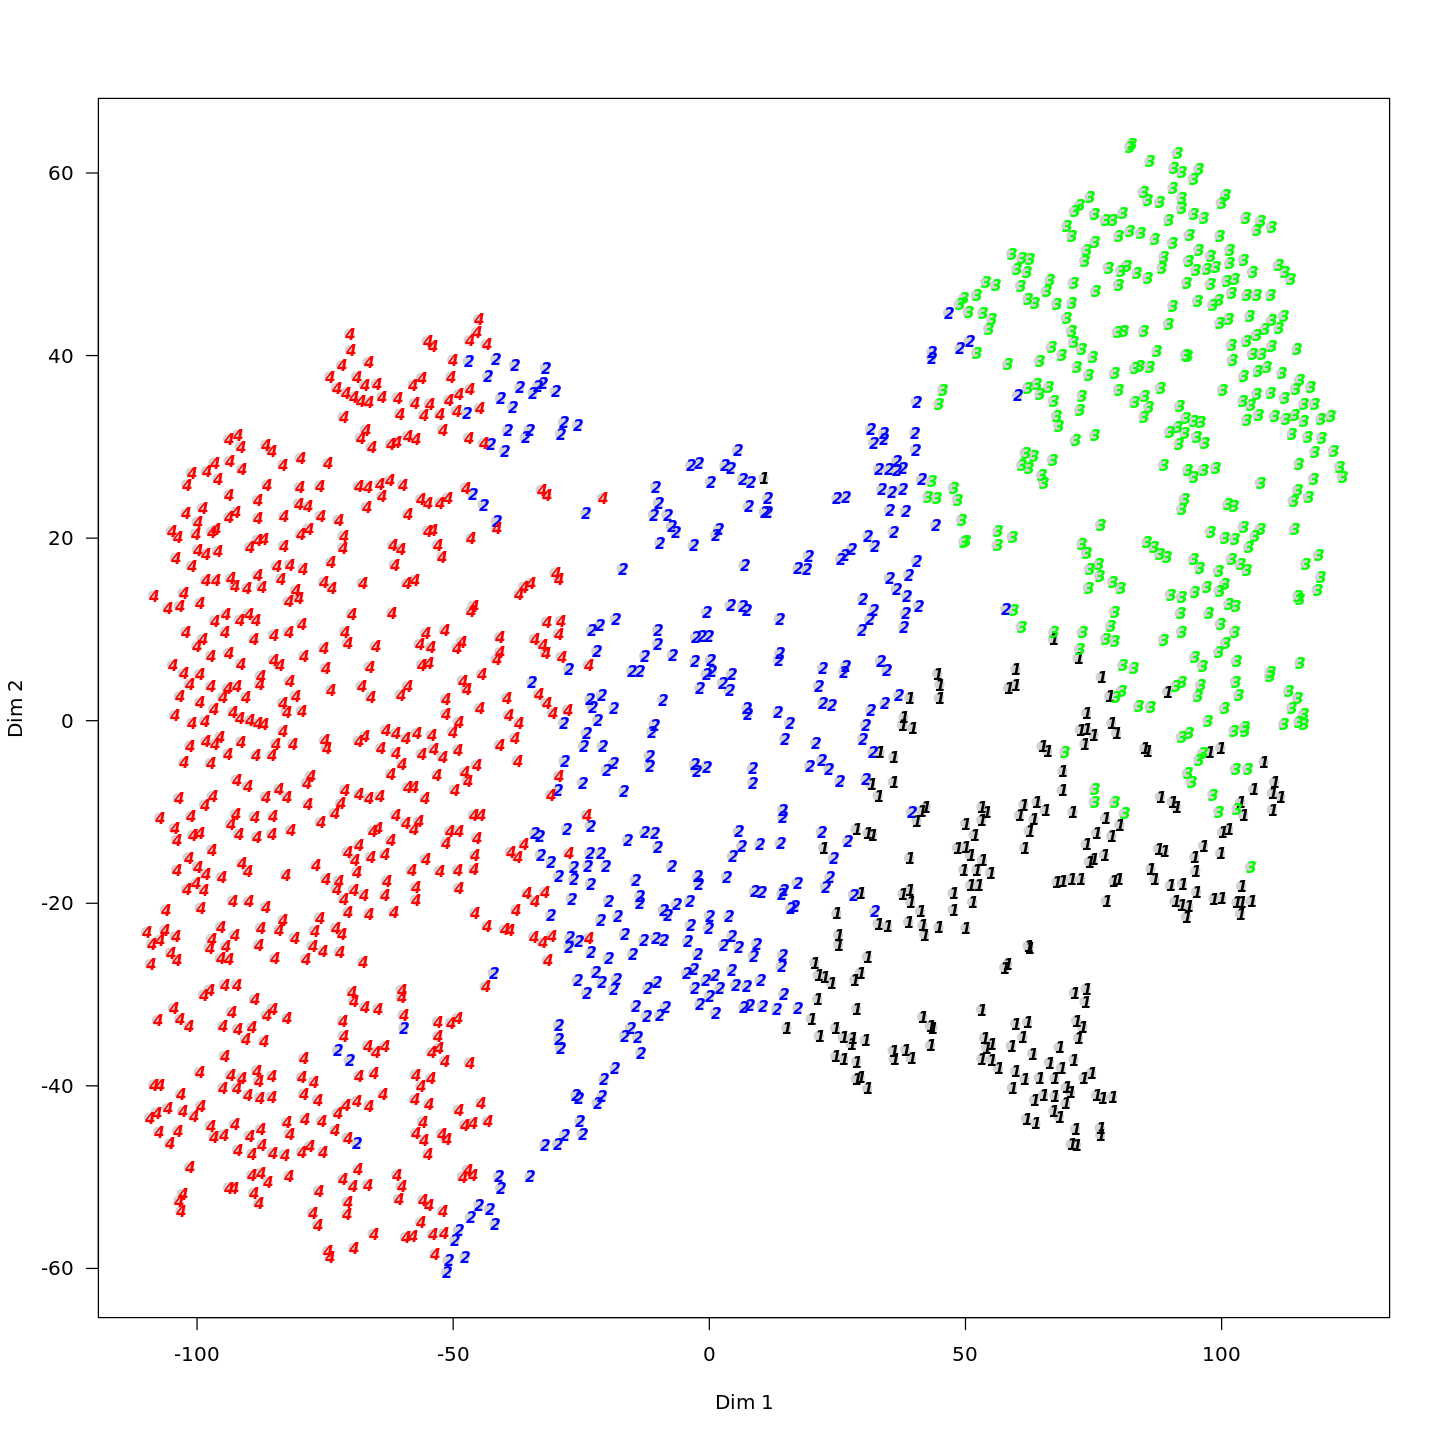

In [5]:
############ Plotting the clusters
options(repr.plot.width=12, repr.plot.height=12)
plottSNE(FG)

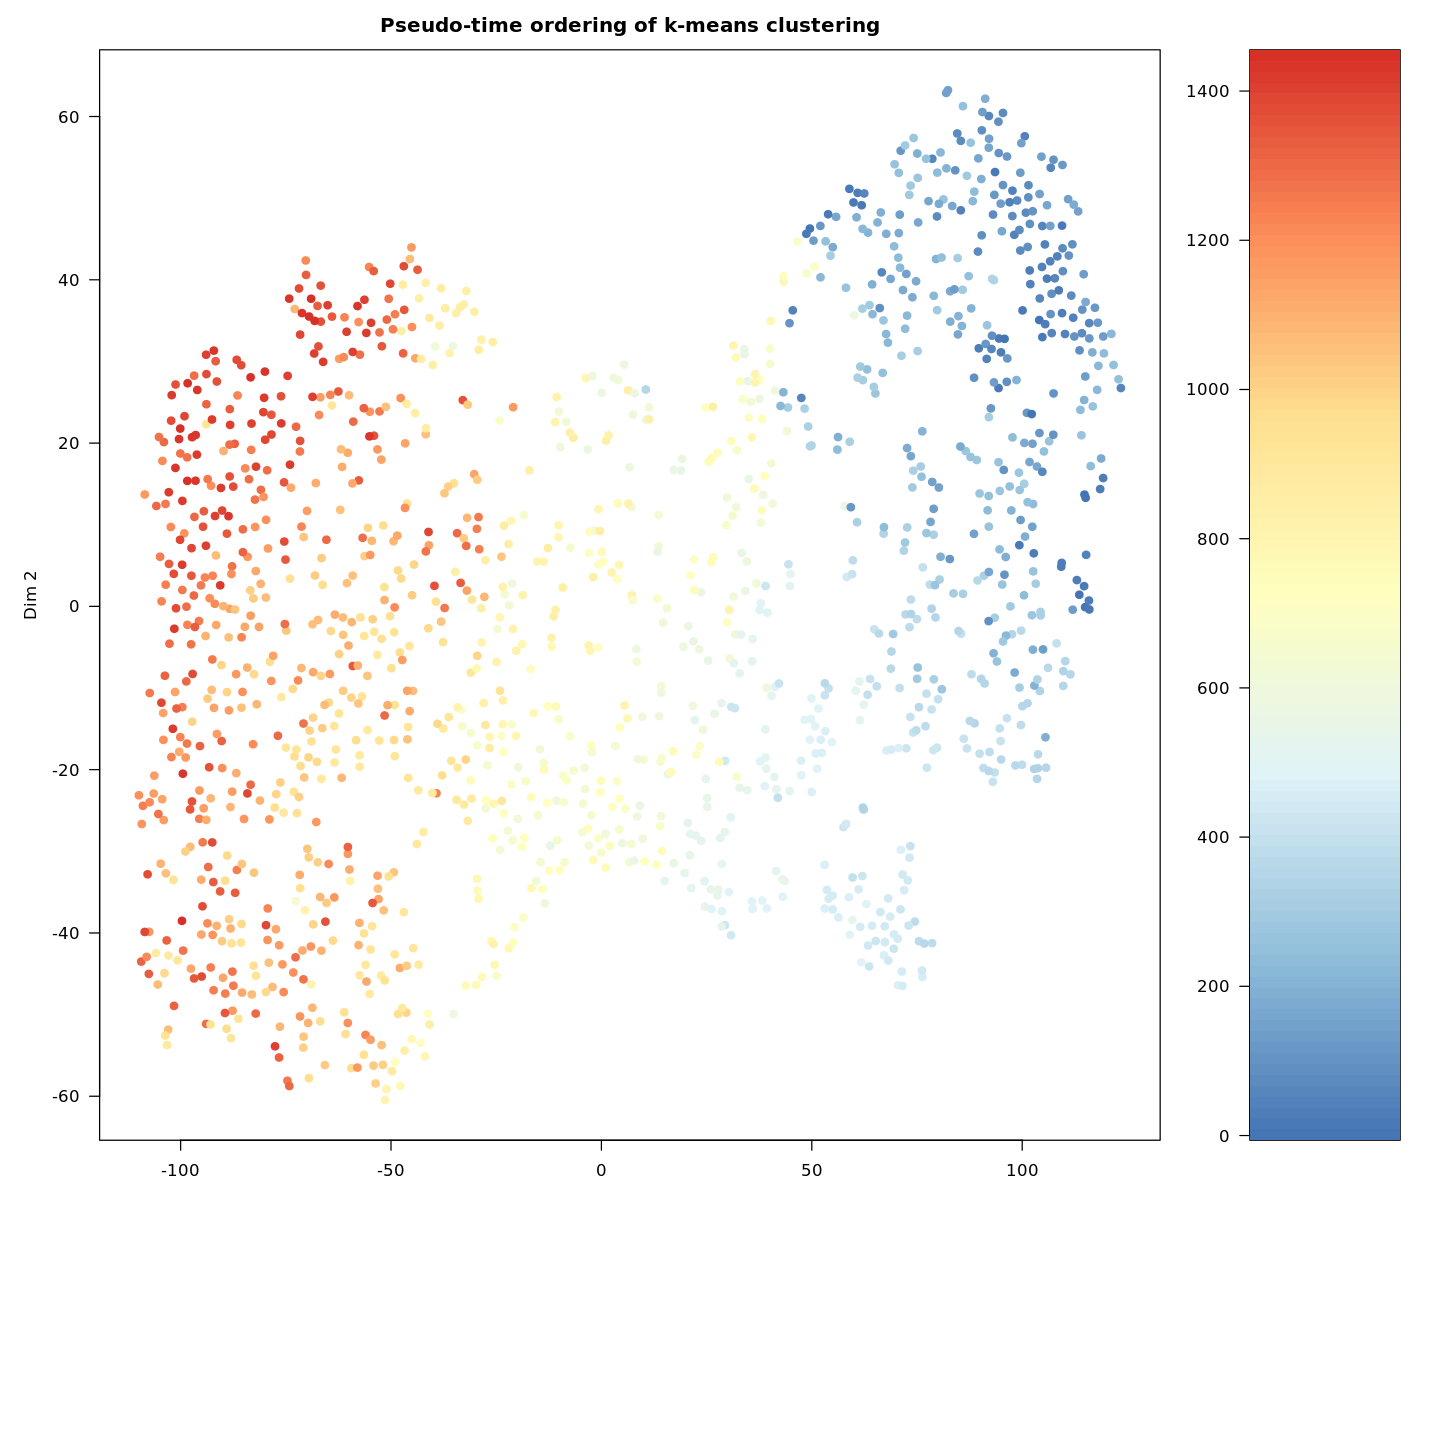

In [6]:
FG<-KmeanOrder(FG,quiet = TRUE, export = FALSE)
plotOrderTsne(FG)

[1] 3 1 2 4

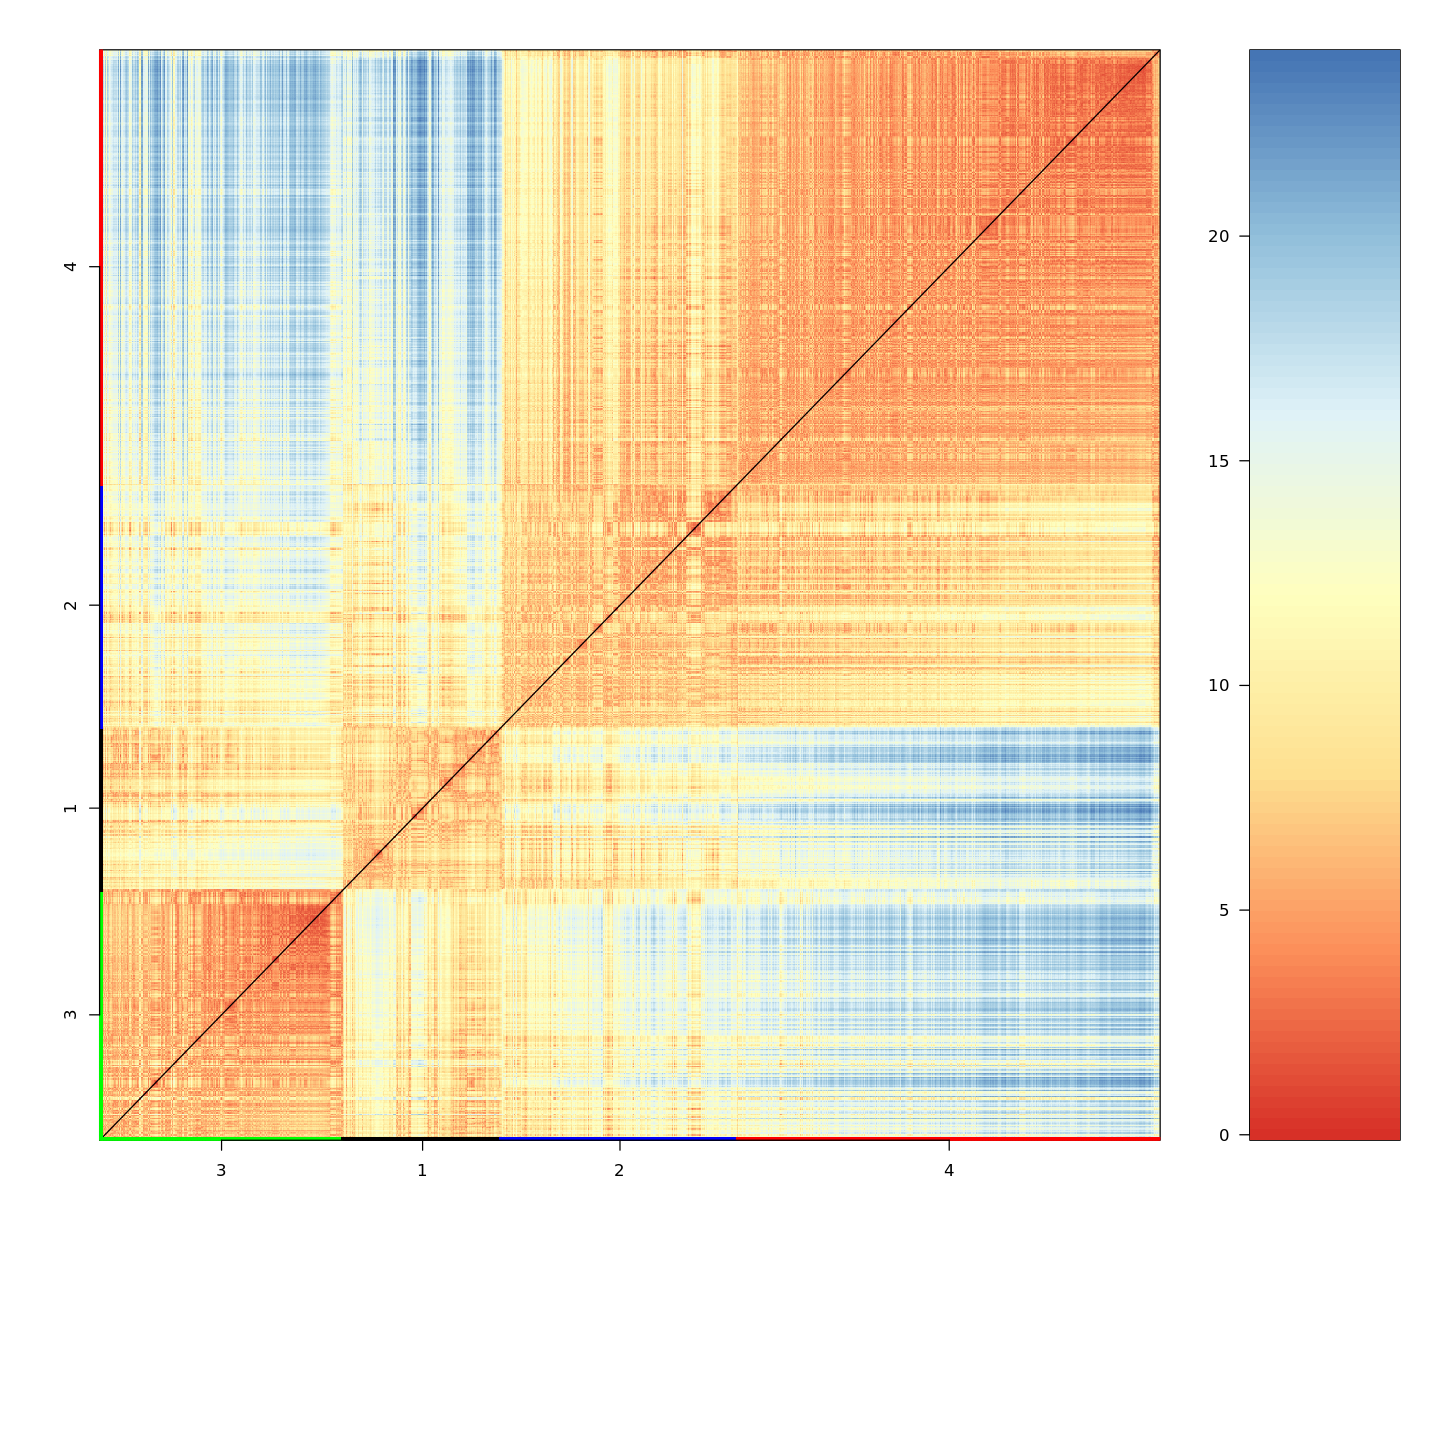

In [7]:
clustheatmap(FG)

####  Evaluating the stability and consistancy of the clusters

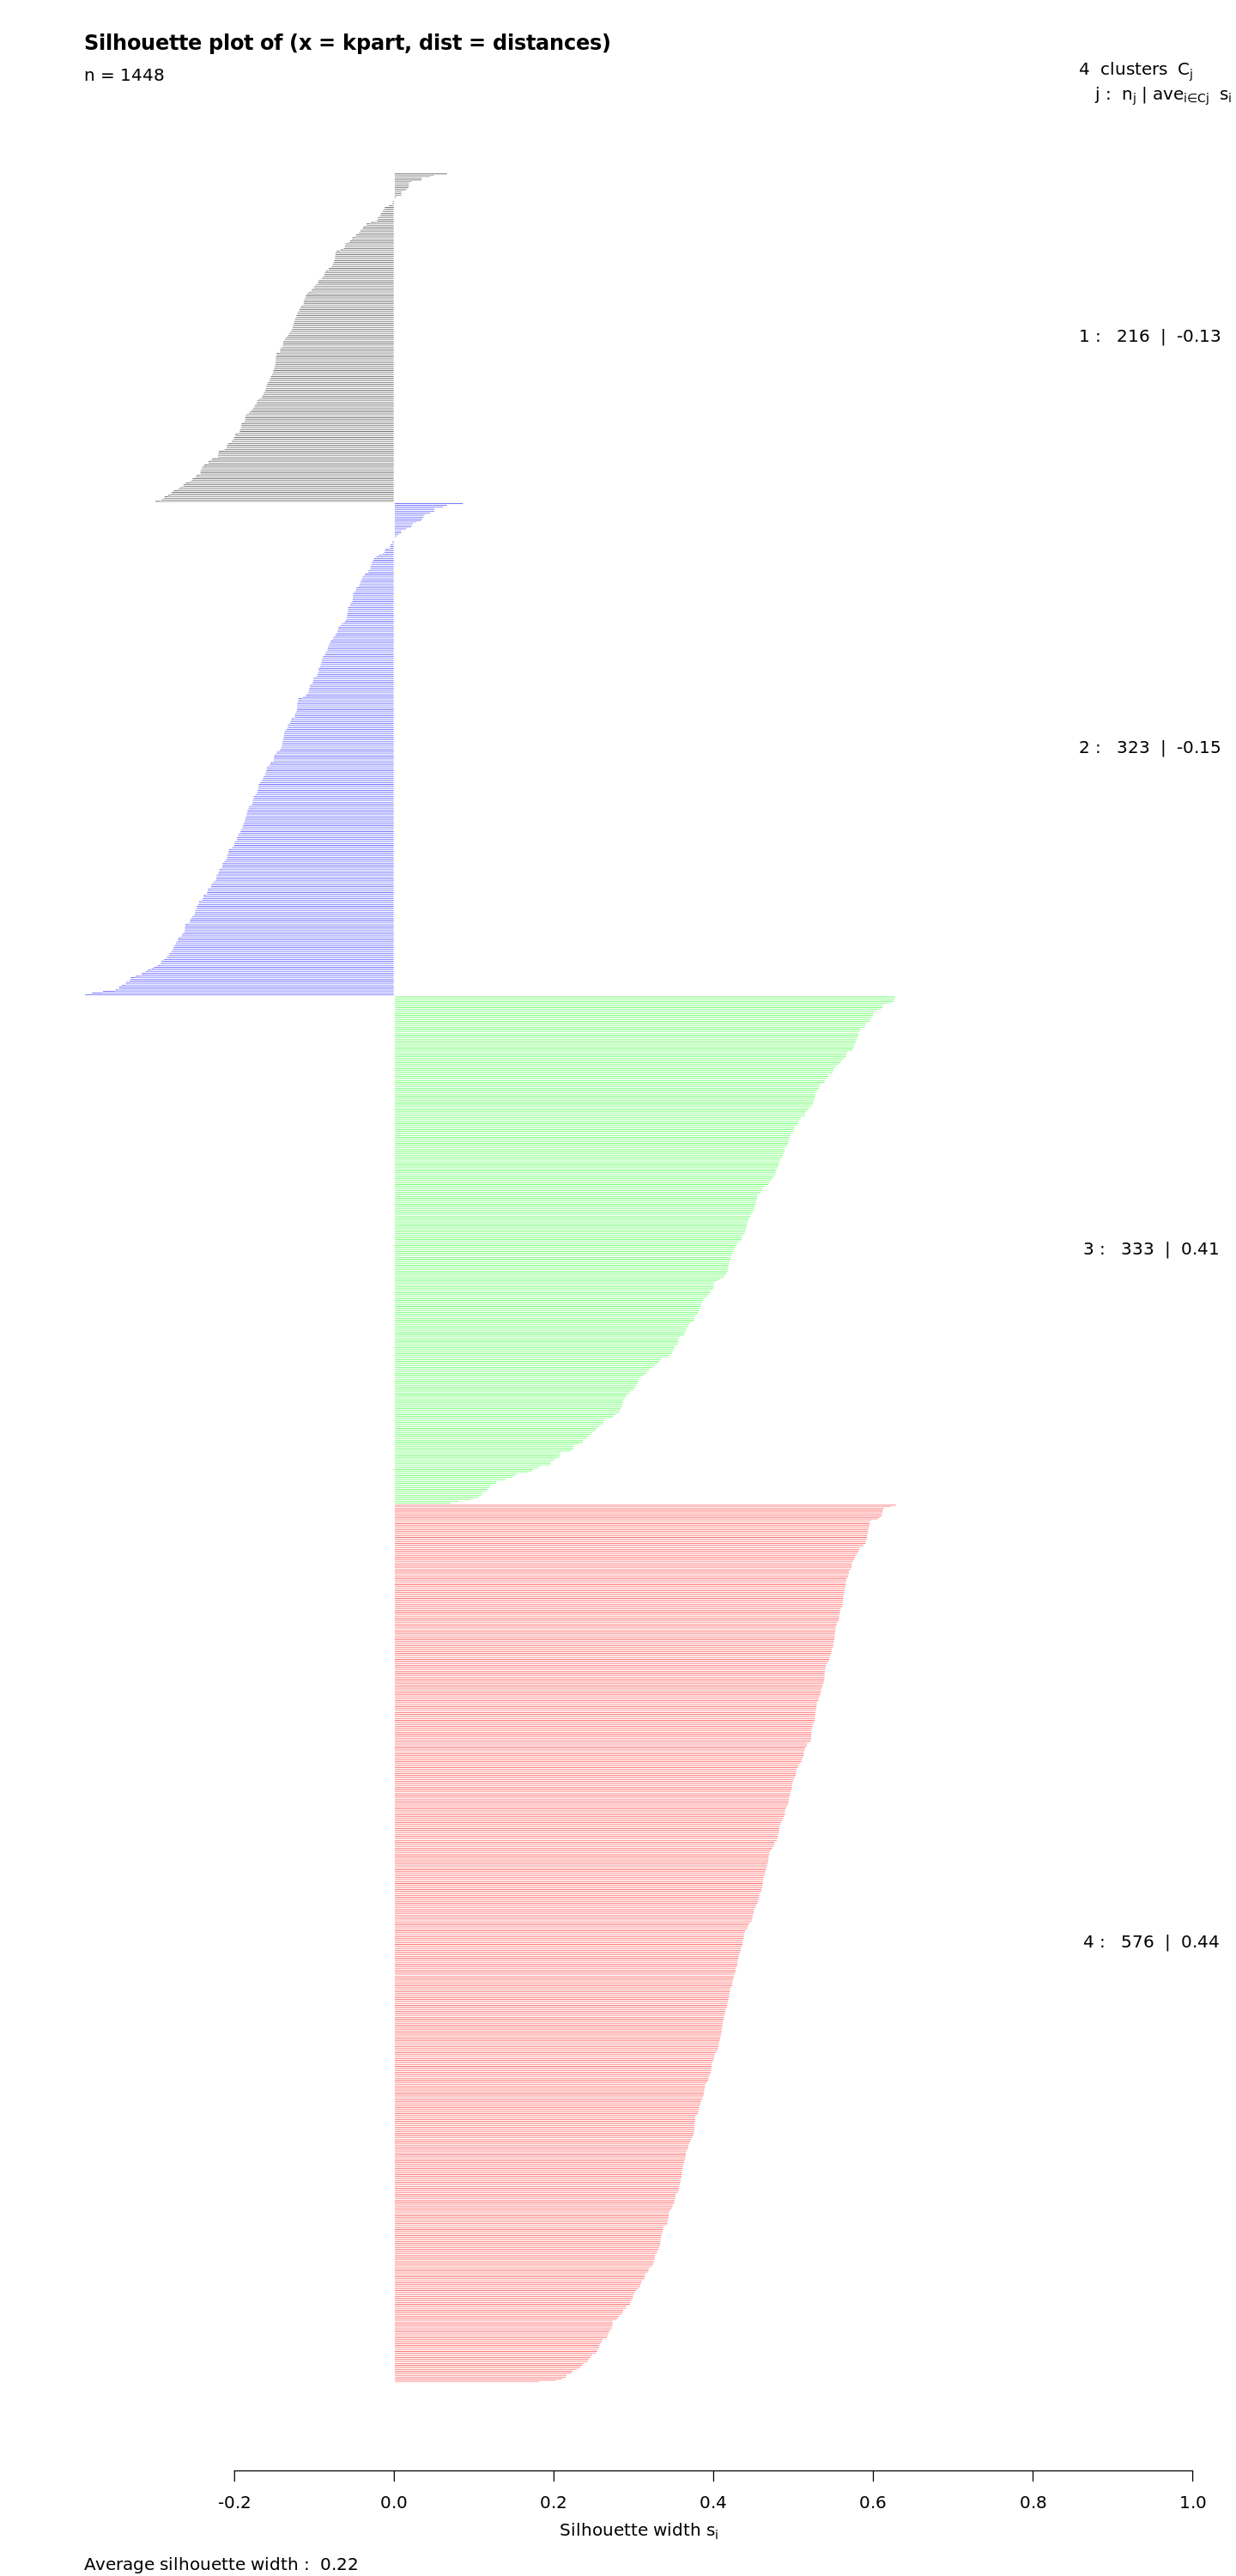

In [8]:
# Silhouette plot
options(repr.plot.width=12, repr.plot.height=25)
plotSilhouette(FG,K=4)       # K is the number of clusters

[1] 0.749 0.671 0.545 0.772

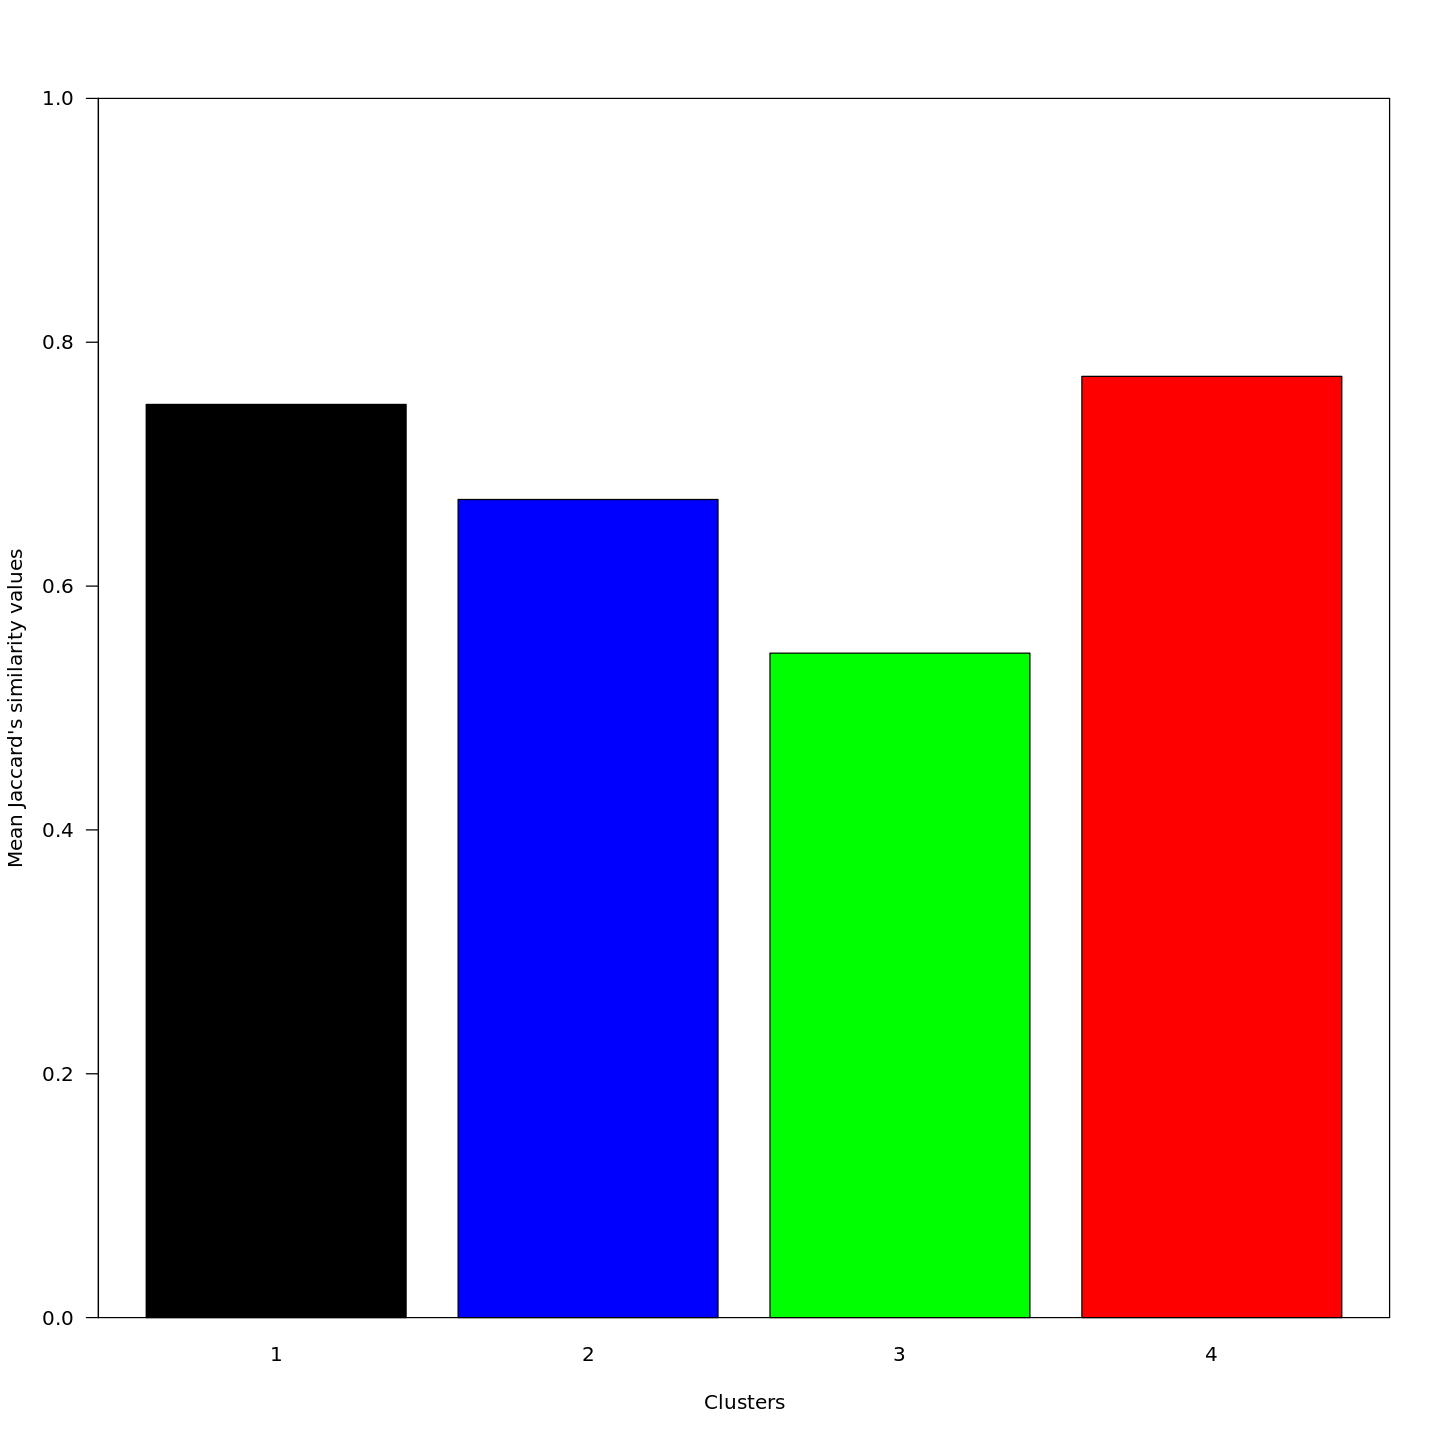

In [9]:
# Jaccard Plot
options(repr.plot.width=12, repr.plot.height=12)
Jaccard(FG,Clustering="K-means", K=4, plot = TRUE)     # Jaccard 

####  Plotting the gene expression of a particular gene in a tSNE map

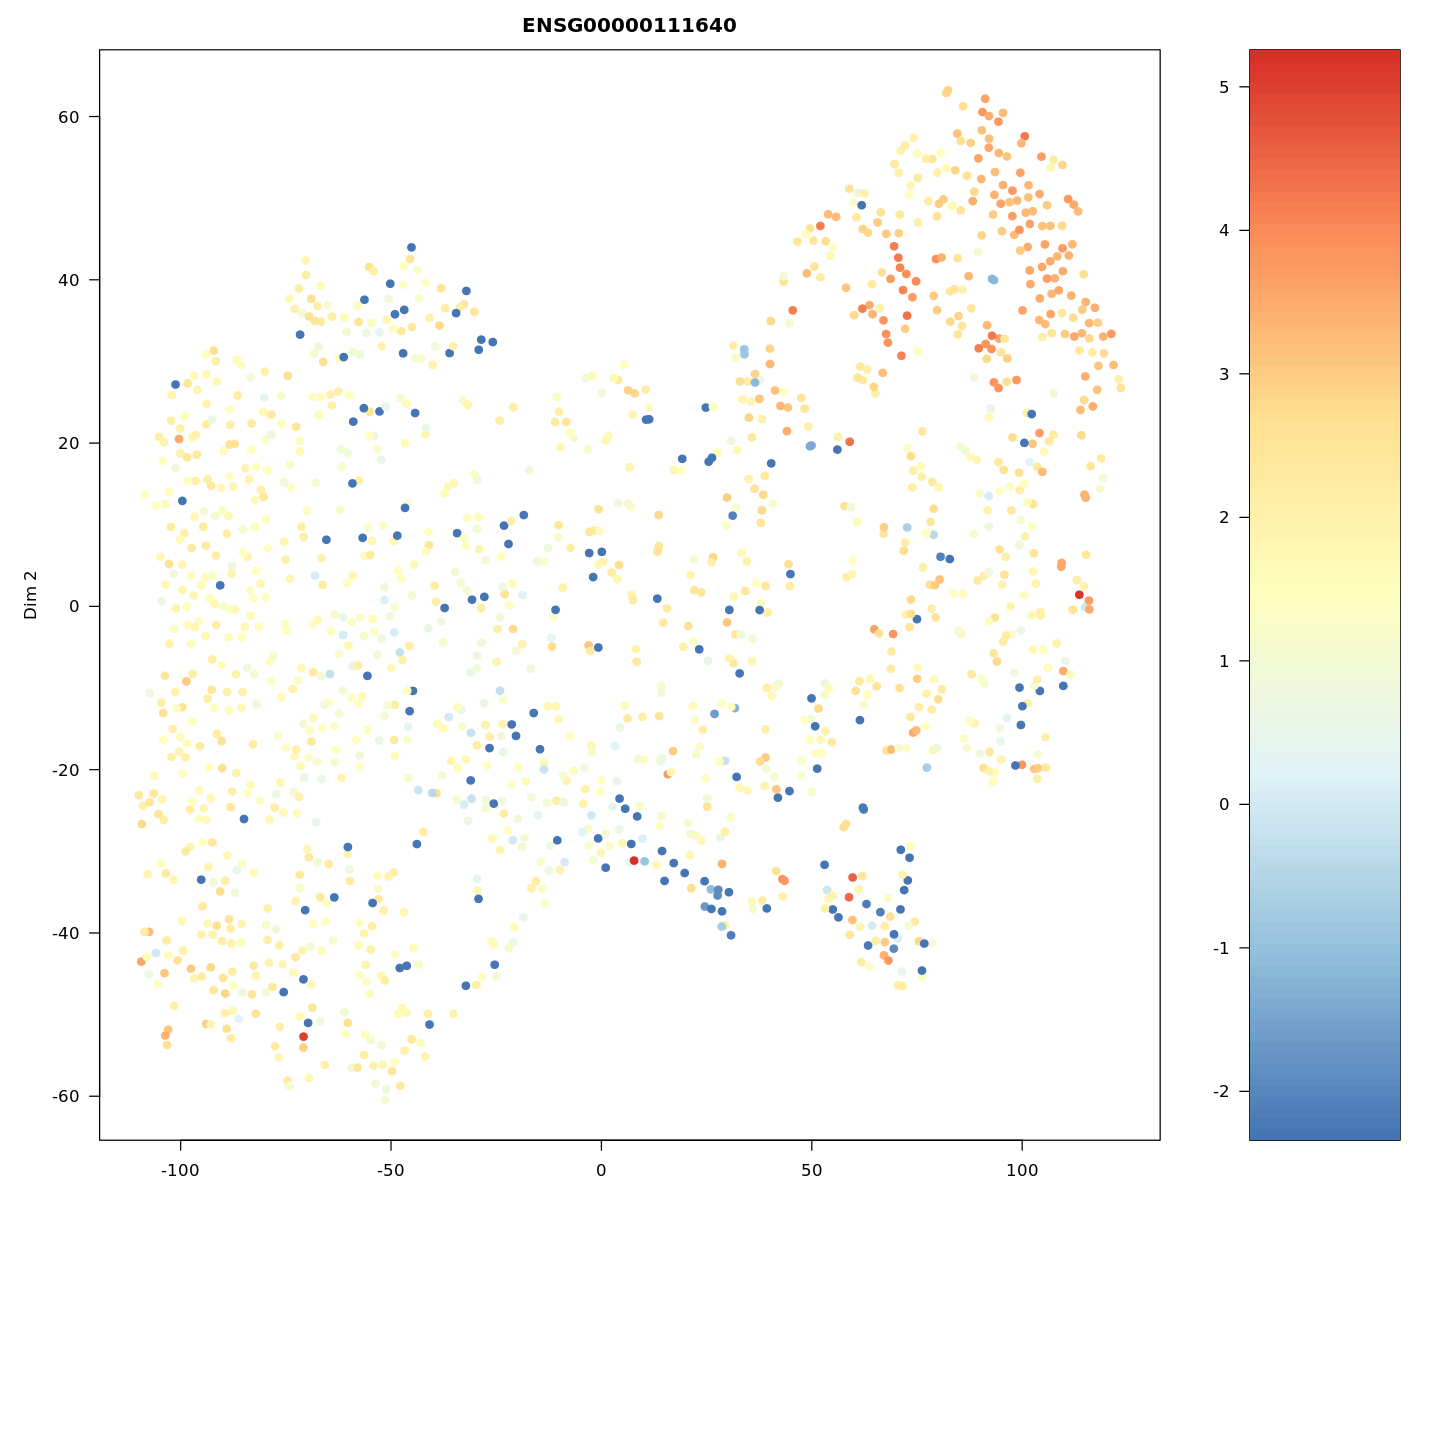

In [10]:
g='ENSG00000111640'                   #### Plotting the log expression of  GAPDH
plotExptSNE(FG,g)